In [ ]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Menampilkan data
# Google Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#import dataset
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datazenius/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#mengecek apakah ada missing value
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dengan bantuan fungsi isna() dan sum() kita tahu bahwa dalam dataset semua kolom tidak ada nilai yang kosong kecuali kolom Age dengan 177 missing value, Kolom Cabin 687 dan kolom Embarked 2

In [ ]:
#menghilangkan missing value
data[data['Age'].isna()]
data[data['Cabin'].isna()]
data[data['Embarked'].isna()]

#drop rows with missing value
data=data.dropna()
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Sudah tidak ada missing value di dataset tersebut.

Untuk variabel-variabel yang ada pada dataset tsb, dapat dibagi dahulu menjadi (1) variabel numerical dan (2) variabel categorical.
Jangan lupa juga tentukan mana yang menjadi target variable dari permasalahan machine learning tersebut dengan dataset titanic

ANALISIS DATA KATEGORI

In [ ]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


Variabel yang akan dihilangkan karena tidak akan digunakan yaitu PassengerId, Name, dan Ticket.


In [ ]:
titanic = data.drop(['PassengerId','Name','Ticket'], axis = 1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,D35,S
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,83.1583,C50,C
887,1,1,female,19.0,0,0,30.0000,B42,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
 7   Cabin     183 non-null    object 
 8   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 18.4+ KB


In [ ]:
def Sex(titanic, colname): 
    def Sex(x): 
        if x=='male': 
            return 1 
        return 0 
    
    return titanic[colname].apply(Sex) 
    
titanic['Sex'] = Sex(titanic, 'Sex' )
titanic['Embarked'] = titanic.Embarked.replace({'S': 0, 'C' : 1, 'Q' : 2})
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,0,38.0,1,0,71.2833,C85,1
3,1,1,0,35.0,1,0,53.1000,C123,0
6,0,1,1,54.0,0,0,51.8625,E46,0
10,1,3,0,4.0,1,1,16.7000,G6,0
11,1,1,0,58.0,0,0,26.5500,C103,0
...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,D35,0
872,0,1,1,33.0,0,0,5.0000,B51 B53 B55,0
879,1,1,0,56.0,0,1,83.1583,C50,1
887,1,1,0,19.0,0,0,30.0000,B42,0


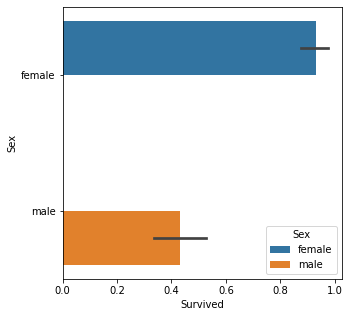

In [ ]:
#Pembuatan barplot (horizontal dan vertikal)
#barplot horizontal
sns.barplot(data=titanic, x="Survived", y="Sex",orient="h", hue="Sex")

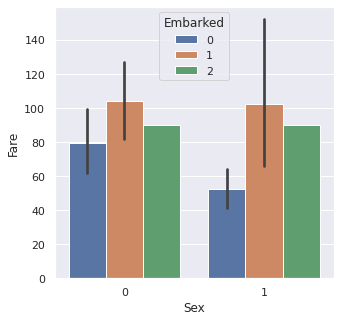

In [ ]:
#barplot vertikal
sns.barplot(data=titanic,x="Sex",y="Fare",hue="Embarked")
sns.set(rc={'figure.figsize':(8,3)})

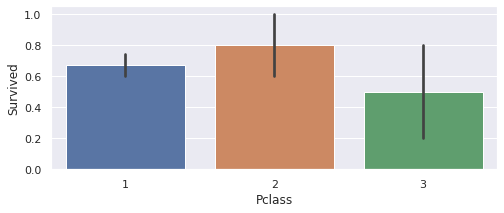

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic)
sns.set(rc={'figure.figsize':(8,3)})

In [ ]:
#Pembuatan distplot

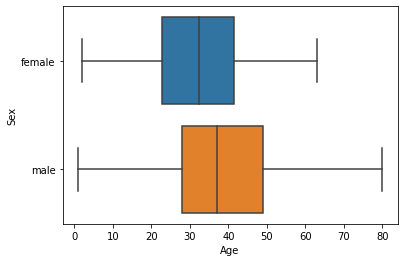

In [ ]:
#Pembuatan boxplot
sns.boxplot(data=titanic,x="Age",y="Sex")

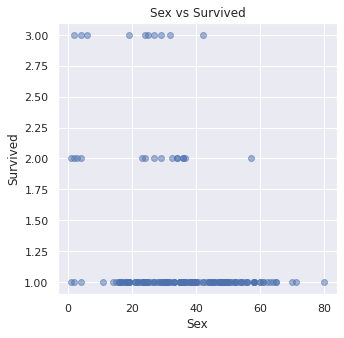

In [ ]:
#Pembuatan scatterplot
plt.scatter(data['Age'], data['Pclass'], alpha=0.5)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Sex vs Survived')
plt.show()

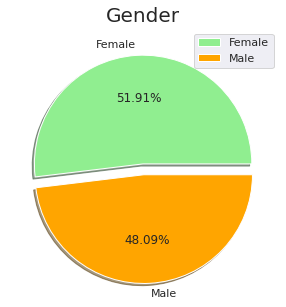

In [ ]:
#Pembuatan pie chart presentase penumpang berdasarkan jenis kelamin
labels = ['Female', 'Male']
size = data['Sex'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

- berdasarkan visualisasi diatas, menunjukkan jumlah presentase penumpang wanita sebanyak 51,91% dan laki-laki sebanyak 48,09%